### Imports

In [80]:
# Analysis and wrangling.
import pandas as pd
import numpy as np

# Graphics libraries.
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Loading data / brief analysis.

In [81]:
student_df = pd.read_csv('./data/challenge_MLE.csv', sep=';')

# Transforming epoch to datetime
student_df['fecha_mesa_epoch'] = pd.to_datetime(student_df['fecha_mesa_epoch'], unit='s')

# Droping duplicates.
student_df.drop_duplicates(inplace=True)

student_df.sample(3)

,particion,periodo,nota_final_materia,fecha_mesa_epoch,nombre_examen,nota_parcial,assignment_id,ass_name,ass_created_at,ass_due_at,...,sub_uuid,score,submission_type,s_submitted_at,s_graded_at,s_created_at,user_uuid,course_uuid,course_name,legajo
27783,20,1-2022,9.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,e854aa87-9ce5-4b8b-9399-5e201cbd4c29,e14f5a9d-992e-4d5f-b9e2-a0c723b4219b,Cloned radical algorithm,262705GPS
100787,34,1-2022,10.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3369ae37-7a6d-48cc-92f6-cc36a5e7b915,119495b0-07dc-45b4-a3c1-706ed67e1d8e,Triple-buffered high-level intranet,150798KGY
125416,21,1-2022,6.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,cb71385e-66fb-40bb-8004-11817365cf09,c34374c5-f9eb-4535-b5cb-82fa62062aec,Switchable heuristic array,018426RKB


In [82]:
# Getting to know df.
student_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194394 entries, 0 to 196123
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   particion           194394 non-null  int64         
 1   periodo             194394 non-null  object        
 2   nota_final_materia  194394 non-null  float64       
 3   fecha_mesa_epoch    7010 non-null    datetime64[ns]
 4   nombre_examen       7010 non-null    object        
 5   nota_parcial        7010 non-null    float64       
 6   assignment_id       25807 non-null   float64       
 7   ass_name            25807 non-null   object        
 8   ass_created_at      25807 non-null   float64       
 9   ass_due_at          25807 non-null   float64       
 10  ass_unlock_at       24529 non-null   float64       
 11  ass_lock_at         25726 non-null   float64       
 12  points_possible     25807 non-null   float64       
 13  ass_name_sub        23993 non-null

In [83]:
# Checking nulls.
pd.DataFrame([student_df.isnull().sum(), (student_df.isnull().sum() / student_df.shape[0] * 100).round(2)]).T

,0,1
particion,0.0,0.00
periodo,0.0,0.00
nota_final_materia,0.0,0.00
fecha_mesa_epoch,187384.0,96.39
nombre_examen,187384.0,96.39
nota_parcial,187384.0,96.39
assignment_id,168587.0,86.72
ass_name,168587.0,86.72
ass_created_at,168587.0,86.72
ass_due_at,168587.0,86.72


# Analyzing data.

<Axes: >

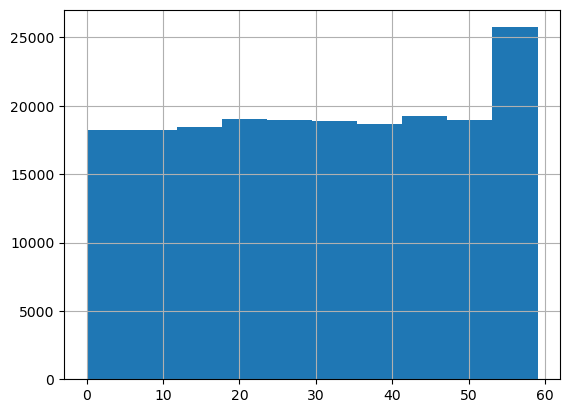

In [84]:
# Checking the time partition.
student_df['particion'].hist()

In [85]:
# Arranging time column.
student_df['periodo'] = student_df['periodo'].str.replace('01', '1')

# Checking the time partition.
student_df['periodo'].value_counts()

periodo
1-2022    193854
2-2022       540
Name: count, dtype: int64

<Axes: >

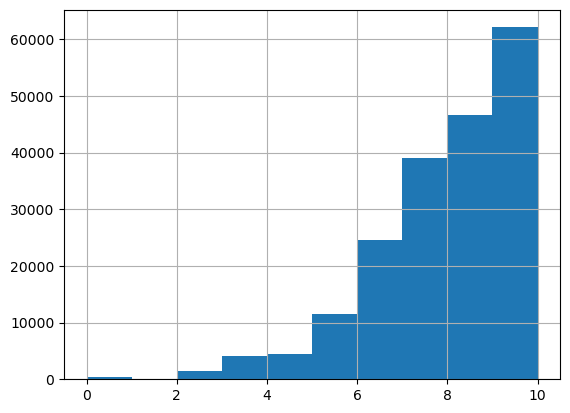

In [86]:
student_df['nota_final_materia'].hist()

In [87]:
student_df['user_uuid'].value_counts()
# the min value for each user is 60, this means each user has a different time partition.
# there are 600 students.

user_uuid
518e8c5f-6632-450b-bcee-518807ff2e9f    1017
ded91bdd-7998-4502-b2cb-9b0081eb3464     824
f2dbd20e-13f8-4d5c-b4ee-70b5ed837d5a     757
6f171fde-7fb3-48e3-b5c0-e89c23631f1a     751
e536d715-fb7a-4e0b-8ac8-bb48a4e39c49     744
                                        ... 
59db8682-a866-4f35-97d1-fbebd7675088      60
8b4d4ea7-664d-473c-8f6c-280744e645d4      60
df99c926-9a5c-495a-803b-fe1c94743cbb      60
35bf6215-6f70-43f2-afd8-e668e5735347      60
ed4e3e5e-5c10-4187-91f7-82114442b119      60
Name: count, Length: 600, dtype: int64

In [88]:
student_df['course_uuid'].value_counts()
# the min value for each course is 60, this means each user has a different time partition.
# there are 582 courses id.

course_uuid
2b274b15-83bb-4629-941e-fdc573af4e0b    11439
c78af3b4-4574-4a82-8c41-45195ce43384    10206
12bb6bfa-8b01-46a8-8cc2-e0e84785fa1e     4489
0034afe6-e996-4c26-b0b9-24dbb9535465     3864
68005d22-90dc-42f6-b90a-409714481cbc     3537
                                        ...  
c7608367-bb39-4722-9270-c93058669c2b       60
c68a3c33-51e2-4dd0-9536-2288eca94fe5       60
132ed50b-ec8b-4ad1-973d-f02eab433a34       60
aef3ac91-4ee5-4f4e-a7cf-620094fa81dc       60
dc53bcc5-440d-4bab-93c7-a749c9eddd85       60
Name: count, Length: 582, dtype: int64

In [89]:
student_df['course_name'].value_counts()
# there are 561 courses names, this doesnt correspond to the amount of curses uuid i've obtained above.

course_name
Intuitive non-volatile ability                11439
Object-based leadingedge help-desk            10206
Face-to-face regional concept                  4489
Stand-alone upward-trending secured line       4129
Total radical adapter                          3537
                                              ...  
Monitored regional artificial intelligence       60
Grass-roots national middleware                  60
Multi-channeled homogeneous policy               60
Operative fresh-thinking knowledge user          60
Operative systematic help-desk                   60
Name: count, Length: 561, dtype: int64

In [90]:
student_df['legajo'].value_counts()
# There are 601 students id, this number doesnt correspond by 1 from the amount of students i've obtained above.

legajo
624097JCN    1017
614851WSA     824
694137GRI     757
372740JAI     751
210665AGT     744
             ... 
517004GYP      60
715923CNS      60
763896XAM      60
890983ESM      60
263794IKM      60
Name: count, Length: 601, dtype: int64

From this little analysis i got that the information in this data set is segregated in different levels. Each row is a unique interaction or activity.

So the goal will be to analyze the different variables and try to generate other useful variables from them.

One thing to do before is to check why there are different amount of course_uuid / course_name and user_uuid / legajo

In [91]:
repeated_course_name = student_df.value_counts(['course_name','course_uuid']).reset_index()
repeated_course_name['course_name'].value_counts()[0:17]

course_name
Monitored fault-tolerant Graphical User Interface    5
Profound eco-centric installation                    3
Ergonomic needs-based support                        2
Customer-focused optimizing attitude                 2
Implemented methodical function                      2
Quality-focused systemic software                    2
Optional exuding alliance                            2
Proactive fresh-thinking project                     2
Quality-focused leadingedge budgetary management     2
Down-sized 24hour migration                          2
Enhanced coherent conglomeration                     2
Function-based systemic info-mediaries               2
Customer-focused multi-state open architecture       2
Phased composite orchestration                       2
Stand-alone upward-trending secured line             2
Cloned radical algorithm                             2
Optimized object-oriented challenge                  2
Name: count, dtype: int64

In [92]:
repeated_student = student_df.value_counts(['user_uuid','legajo']).reset_index()
repeated_student['user_uuid'].value_counts()[:1]

user_uuid
9d0a3bf7-7efc-405f-bd96-60d75f6033b4    2
Name: count, dtype: int64

# Data Wrangling.

im going top start by creating a unique variable that im going to use as index, by using the features user_uuid/course_uuid/particion

In [96]:
student_df['index'] = student_df['user_uuid'] + '/' + student_df['course_uuid']
student_df.sample(2)

,particion,periodo,nota_final_materia,fecha_mesa_epoch,nombre_examen,nota_parcial,assignment_id,ass_name,ass_created_at,ass_due_at,...,score,submission_type,s_submitted_at,s_graded_at,s_created_at,user_uuid,course_uuid,course_name,legajo,index
159501,32,1-2022,5.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2aca9718-523f-4cb5-8b83-ed362699e0fd,d6c3b308-12c6-42e4-b544-4b0db85904e1,Multi-tiered tertiary array,024514ISR,2aca9718-523f-4cb5-8b83-ed362699e0fd/d6c3b308-...
85288,40,1-2022,8.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,73b2767e-97a7-4bfe-9078-46e6a4bc2faf,0034afe6-e996-4c26-b0b9-24dbb9535465,Stand-alone upward-trending secured line,613632LZQ,73b2767e-97a7-4bfe-9078-46e6a4bc2faf/0034afe6-...


In [97]:
# Amount of unique formed indexes.
len(student_df['index'].unique())

2969

In [107]:
student_df.groupby(['index','nota_final_materia'])['fecha_mesa_epoch'].count()

index                                                                      nota_final_materia
01103370-3046-4bc0-a8f8-85858ec0ec88/2dd2ca01-a672-4eca-aca7-6fbc8cd01953  7.0                   2
01103370-3046-4bc0-a8f8-85858ec0ec88/a8c25bca-c5e5-4225-b51e-f61468d20386  9.0                   2
01103370-3046-4bc0-a8f8-85858ec0ec88/bf8d7a98-903d-4dea-b4d2-275394aa0a06  8.0                   2
01103370-3046-4bc0-a8f8-85858ec0ec88/d17e238c-c4c6-40d7-8085-801268d6d723  9.0                   2
01103370-3046-4bc0-a8f8-85858ec0ec88/e1b3a8df-6ed2-45b9-b623-58037efe9b98  10.0                  0
                                                                                                ..
ff6b6af0-b7d7-42f4-821d-afd5ee6ef9a5/12bb6bfa-8b01-46a8-8cc2-e0e84785fa1e  8.0                   3
ff6b6af0-b7d7-42f4-821d-afd5ee6ef9a5/2b274b15-83bb-4629-941e-fdc573af4e0b  9.0                   2
ff6b6af0-b7d7-42f4-821d-afd5ee6ef9a5/68005d22-90dc-42f6-b90a-409714481cbc  7.0                   3
ff6b6af0-b7d7-4